### Random Forest Modelling

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


Membaca file train dan test

In [32]:
train = pd.read_csv('D:/rakamin/final project/finpro_rakamin/finpro_rakamin/final_project\dataset/after_selection/train_after_selection.csv')
test = pd.read_csv('D:/rakamin/final project/finpro_rakamin/finpro_rakamin/final_project\dataset/after_selection/test_after_selection.csv')


In [33]:
train.shape

(90310, 11)

In [34]:
test.shape

(127037, 10)

Terdapat perbedaan data kolom dan row pada data train dan test

In [35]:
train.head()

,Unnamed: 0.1,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction,Response
0,0,255531,1,46.0,1,0,0,152.0,0,0,0
1,1,27423,1,46.0,1,0,0,152.0,0,0,0
2,2,253915,1,46.0,1,1,1,26.0,2,2,0
3,3,167018,1,18.0,1,0,0,152.0,1,0,0
4,4,26965,1,11.0,0,1,1,122.0,2,2,0


In [36]:
test.head()

,Unnamed: 0.1,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
0,0,0,1,11.0,1,0,0,152.0,0,0
1,1,1,1,28.0,0,1,1,7.0,0,0
2,2,2,1,28.0,0,1,1,124.0,0,0
3,3,3,1,27.0,1,0,1,152.0,0,0
4,4,4,1,28.0,1,0,0,152.0,0,0


Memisah feature dan target

In [37]:
training_data, testing_data = train.drop('Response', axis=1),train['Response']

Membuat data test dan training dengan perbandingan 20:80

In [38]:
X_train, X_test, y_train, y_test = train_test_split(training_data,testing_data, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,Unnamed: 0.1,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
20496,20496,285526,1,48.0,0,1,1,26.0,2,2
61232,61232,135711,1,28.0,0,2,1,26.0,2,2
63399,63399,153894,1,46.0,0,1,1,124.0,2,2
15134,15134,79614,1,16.0,0,0,0,152.0,0,0
467,467,117925,1,28.0,1,1,0,55.0,2,0


In [40]:
X_train.shape

(72248, 10)

In [41]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model pada data latih
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Lakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluasi lainnya (misalnya, classification report)
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9076
           1       1.00      1.00      1.00      8986

    accuracy                           1.00     18062
   macro avg       1.00      1.00      1.00     18062
weighted avg       1.00      1.00      1.00     18062



Evaluasi model menunjukkan hasil yang sangat baik. Mari kita pahami maknanya:

1. Akurasi:
Akurasi merupakan persentase dari jumlah prediksi yang benar dibandingkan dengan total jumlah sampel.
Nilai akurasi 1.00 (100%) menunjukkan bahwa model melakukan prediksi yang sempurna pada data uji yang diberikan.
2. Precision, Recall, dan F1-Score:
Precision (presisi): Nilai 1.00 menunjukkan bahwa dari semua prediksi positif yang dibuat oleh model, semuanya benar.
Recall (recall): Nilai 1.00 menunjukkan bahwa model berhasil mendeteksi semua instance yang benar positif.
F1-Score: Nilai 1.00 adalah hasil harmonik dari precision dan recall, memberikan indikasi baiknya keseimbangan antara precision dan recall.
3. Support:
Support adalah jumlah instance yang termasuk dalam setiap kelas.
4. Macro Avg dan Weighted Avg:
Macro Avg: Ini adalah rata-rata dari metrik di setiap kelas tanpa memperhitungkan distribusi kelas. Jika Anda memiliki kelas dengan jumlah sampel yang tidak seimbang, macro avg dapat memberikan pandangan umum tentang kinerja model di seluruh kelas.
Weighted Avg: Ini adalah rata-rata yang memberikan bobot lebih besar untuk kelas dengan jumlah sampel yang lebih besar. Ini bermanfaat ketika distribusi kelas tidak seimbang.
Dengan nilai-nilai yang sangat tinggi di semua metrik ini, model sepertinya melakukan dengan sangat baik pada data uji yang digunakan untuk evaluasi. Namun, penting untuk dicatat bahwa hasil yang sangat baik seperti ini juga dapat menunjukkan kemungkinan overfitting pada data yang digunakan untuk pelatihan model. Penting untuk memastikan bahwa model Anda dapat melakukan prediksi dengan baik pada data yang belum pernah dilihat sebelumnya untuk memastikan generalisasi yang baik.

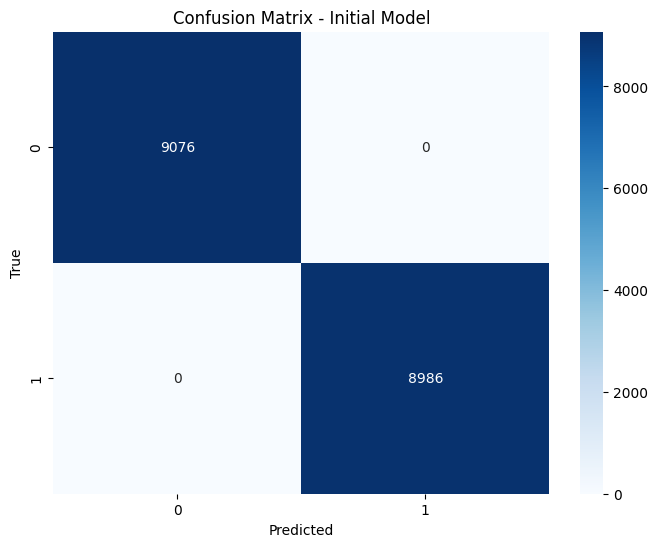

In [48]:
from sklearn.metrics import confusion_matrix

# Fungsi untuk plot matriks konfusi
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot matriks konfusi untuk model awal
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], title='Confusion Matrix - Initial Model')


Dari matriks konfusi diatas dapat disimpulkan bahwa prediksi yang dihasilkan adalah:
1. True Positive (TP) :
Interpretasi: Model memprediksi positif dan itu benar.
2. True Negative (TN):
Interpretasi: Model memprediksi negatif dan itu benar.


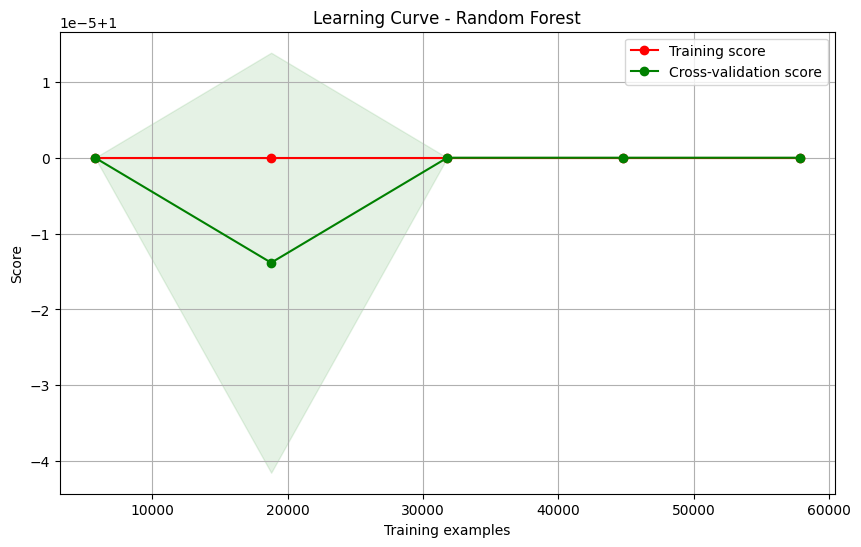

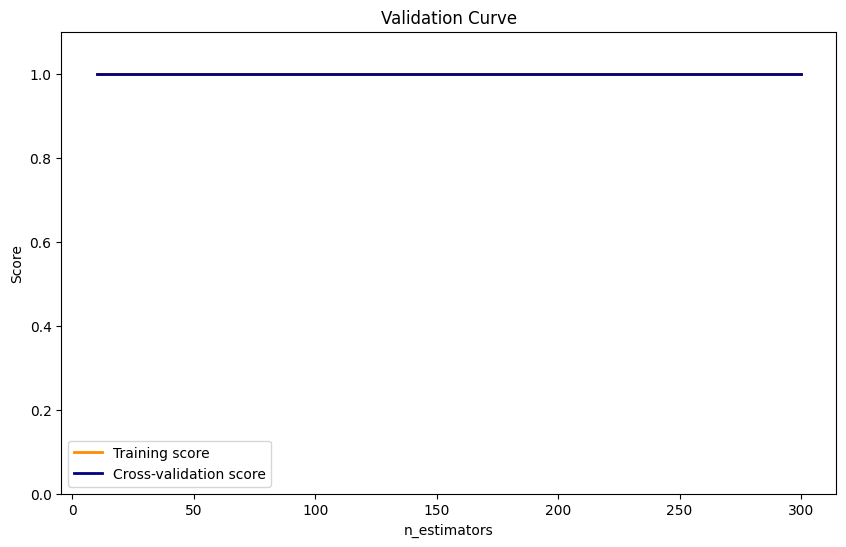

In [45]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

    plt.legend(loc="best")
    return plt

# Plot Learning Curve
title = "Learning Curve - Random Forest"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5)

# Plot Validation Curve 
param_range = [10, 50, 100, 200, 300]
plot_validation_curve(rf_model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

plt.show()

Terlihat dari dua plot diatas bahwa modelnya tidak mengalami underfit ataupun overfit.

C:\Users\Muhammad Iqbal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


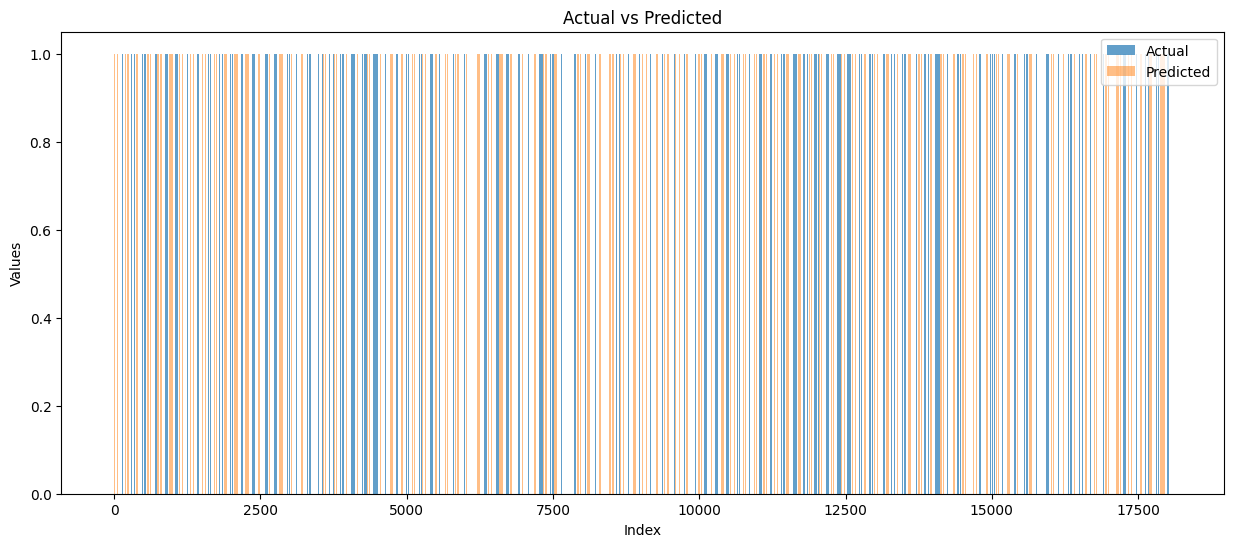

In [47]:
import matplotlib.pyplot as plt

# Membuat array x untuk indeks
x = np.arange(0, len(y_test))

# Mendapatkan prediksi dari model
y_predict = rf_model.predict(X_test)

# Plot hasil prediksi dan nilai aktual
plt.figure(figsize=(15, 6))

# Plot bar untuk nilai aktual
plt.bar(x - 0.2, y_test, width=0.4, label='Actual', alpha=0.7)

# Plot bar untuk nilai prediksi dengan transparansi
plt.bar(x + 0.2, y_predict, width=0.4, label='Predicted', alpha=0.5)

# Pengaturan lainnya
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

Dapat dilihat juga tidak ada perbedaan dari data aktual dan data prediksi

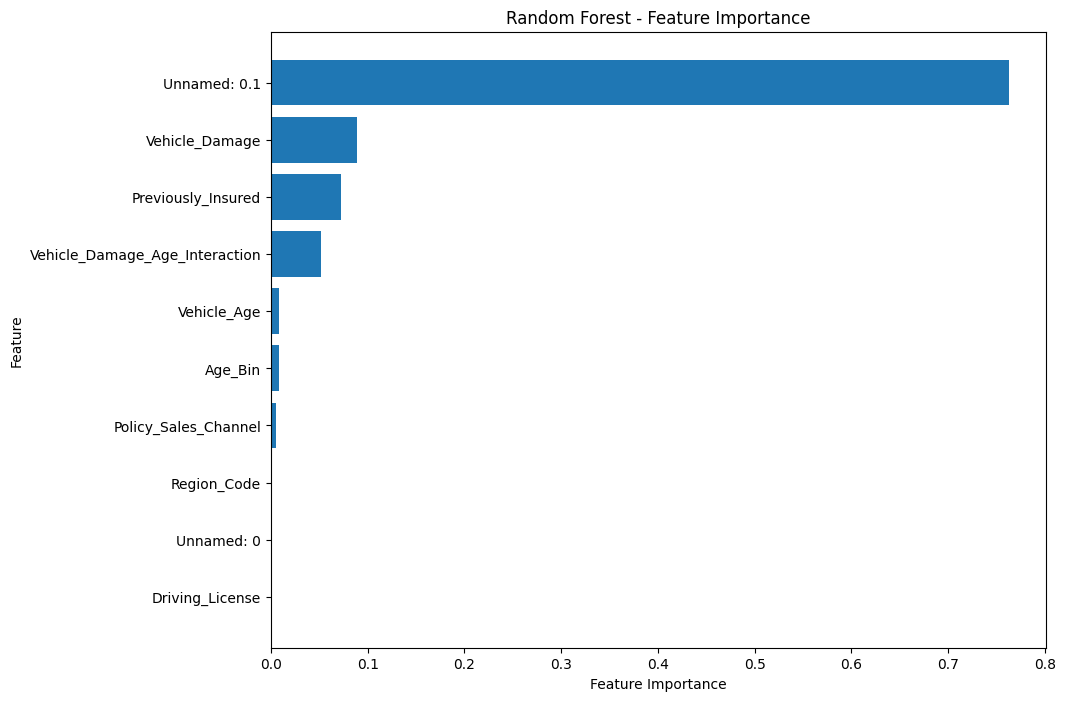

In [50]:
# Mendapatkan feature importance dari model
feature_importance = rf_model.feature_importances_

# Mendapatkan nama fitur
feature_names = X_train.columns

# Mengurutkan indeks fitur berdasarkan feature importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest - Feature Importance")
plt.show()